# Plotting elasticity and accoustic velocities at high PT with `qha-cij`

This tutorial demostrate how to programmingly invoke `qha-cij` package in Python, and how to plot with it.

## Load the configuration and run the `Calculator`

In [1]:
import cij.core.calculator


calculator = cij.core.calculator.Calculator("_attachments/plotting/config.yml")

/Users/chazeon/Documents/Projects/qha-cij-2/cij/core/phonon_contribution/nonshear.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return  h_div_k * (self.freq_array[nax,:,:,:] / self.t_array[:,nax,nax,nax])
/Users/chazeon/Documents/Projects/qha-cij-2/cij/core/phonon_contribution/nonshear.py:119: RuntimeWarning: invalid value encountered in true_divide
  return  h_div_k * (self.freq_array[nax,:,:,:] / self.t_array[:,nax,nax,nax])
/Users/chazeon/Documents/Projects/qha-cij-2/cij/core/phonon_contribution/nonshear.py:141: RuntimeWarning: overflow encountered in exp
  return self.Q ** 2 * numpy.exp(self.Q) / (numpy.exp(self.Q) - 1) ** 2
/Users/chazeon/Documents/Projects/qha-cij-2/cij/core/phonon_contribution/nonshear.py:141: RuntimeWarning: overflow encountered in square
  return self.Q ** 2 * numpy.exp(self.Q) / (numpy.exp(self.Q) - 1) ** 2
/Users/chazeon/Documents/Projects/qha-cij-2/cij/core/phonon_contribution/nonshear.py:141: RuntimeWarning: invalid value encountered 

03 -> []
03 -> [11(1111), 12(1122), 12(1122), 22(2222)]
04 -> dict_keys([])
04 -> dict_keys([11(1111), 12(1122), 22(2222)])
03 -> []
03 -> [11(1111), 12(1122), 12(1122), 22(2222)]
04 -> dict_keys([])
04 -> dict_keys([11(1111), 12(1122), 22(2222)])
03 -> []
03 -> [11(1111), 12(1122), 12(1122), 22(2222)]
04 -> dict_keys([])
04 -> dict_keys([11(1111), 12(1122), 22(2222)])


## Plotting elastic moduli

Here we prepare a plot for $c_{ij}$ for forsterite.

First let's setup matplotlib

In [2]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.dpi']= 144
import matplotlib.pyplot as plt
import numpy

Prepare the color map from temperature to color

In [3]:
from cij.plot import color_x

cmap = color_x(0, 3000)

Now we get the pressures `p_array` and temperature array `t_array`.

In [4]:
from cij.util import units

p_array = units.Quantity(
    calculator.qha_calculator.pressure_base.p_array,
    units.rydberg / units.bohr ** 3).to(units.GPa).magnitude
t_array = calculator.qha_calculator.t_array

p_indices = calculator.qha_calculator.pressure_base.volumes < numpy.max([
        volume.volume for volume in calculator.qha_input.volumes
    ])
p_indices = numpy.ones(calculator.qha_calculator.pressure_base.volumes.shape, dtype=bool)

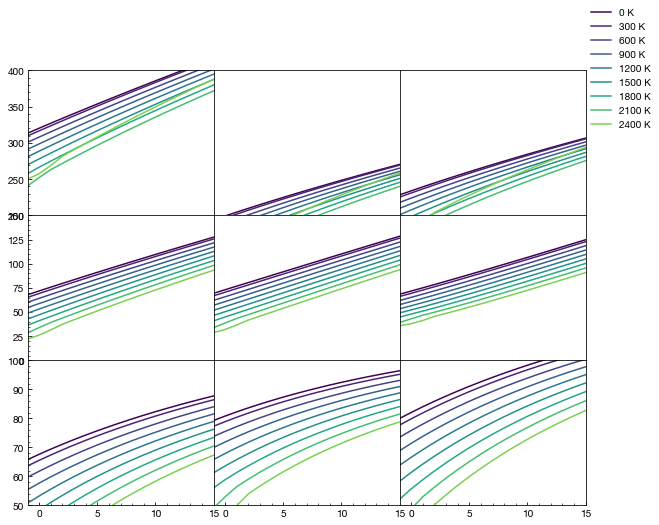

In [5]:
from cij.util import c_

fig, axes = plt.subplots(3, 3, sharex=True, figsize=(10, 8))

keys = {
    c_(11): (0,0),
    c_(22): (0,1),
    c_(33): (0,2), 
    c_(12): (1,0),
    c_(13): (1,1),
    c_(23): (1,2), 
    c_(44): (2,0), 
    c_(55): (2,1), 
    c_(66): (2,2), 
}

ylims = [(200, 400), (0, 150), (50, 100)]

for key, (j, k) in keys.items():
    ax = axes[j, k]
    moduli = units.Quantity(
        calculator.pressure_base.v2p(calculator.modulus_adiabatic[key]),
        units.rydberg / units.bohr ** 3).to(units.GPa).magnitude
    for i in range(0, t_array.shape[0], 3):
        t = t_array[i]
        ax.plot(p_array[p_indices[i,:]], moduli[i, p_indices[i,:]], label=f"{t} K", c=cmap(t))

    ax.set_ylim(*ylims[j])
    ax.set_xlim(min(p_array), max(p_array))
    ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
    if j != 2: ax.xaxis.set_visible(False)
    if k != 0: ax.yaxis.set_visible(False)

fig.legend([
    matplotlib.lines.Line2D([], [], color=cmap(t))
    for t in t_array[::3]
], [f"{t} K" for t in t_array[::3]])

fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

## Plotting accoustic velocities

Next we plot primary velocities $v_\text{s}$ and secondary velocities $v_\text{p}$

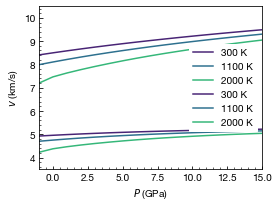

In [6]:
plt.figure(figsize=(4, 3))

for velocity in [
    calculator.pressure_base.primary_velocities,
    calculator.pressure_base.secondary_velocities
]:

    for i in [3, 11, 20]:
        t = t_array[i]
        plt.plot(
            p_array[p_indices[i,:]],
            velocity[i, p_indices[i,:]],
            label=f"{t} K", c=cmap(t)
        )

plt.legend()
plt.xlabel("$P$ (GPa)")
plt.ylabel(r"$v$ (km/s)")
plt.ylim(3.5, 10.5)
plt.xlim(-1, 15)

plt.show()

## Plotting with plotter

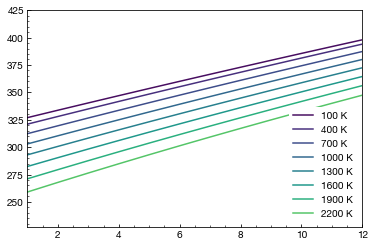

In [7]:
from cij.plot import Plotter

plotter = Plotter(calculator)

plt.figure()



for t in range(100, 2500, 300):
    
    plotter.plot_cij_p(plt.gca(), 11, t, c=cmap(t), label=f"{t} K")
    
plt.xlim(1, 12)
# plt.ylim(200, 800)

plt.legend()

plt.show()

In [8]:
from cij.plot import Plotter

plotter = Plotter(calculator)

plt.figure()



for t in range(100, 2500, 300):
    
    _plot = lambda p_array, c_array: plt.plot(p_array, c_array, c=cmap(t), label=f"{t} K")
    
    plotter.plot_cij_p_with(_plot, 11, t)
    
plt.xlim(1, 12)

plt.legend()

plt.show()

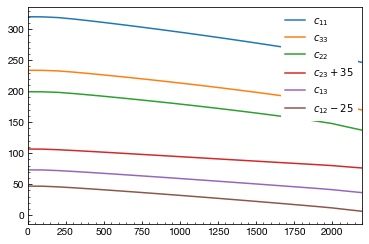

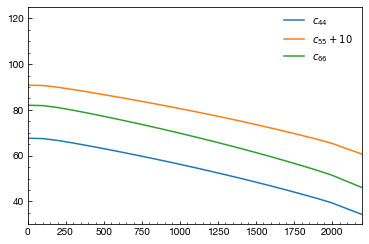

In [9]:
from cij.plot import Plotter

plotter = Plotter(calculator)

plt.figure()

p = 0

for _key, _plot in [
    (11, lambda p_array, c_array: plt.plot(p_array, c_array, label=r"$c_{11}$")),
    (33, lambda p_array, c_array: plt.plot(p_array, c_array, label=r"$c_{33}$")),
    (22, lambda p_array, c_array: plt.plot(p_array, c_array, label=r"$c_{22}$")),
    (23, lambda p_array, c_array: plt.plot(p_array, c_array + 35, label=r"$c_{23}+35$")),
    (13, lambda p_array, c_array: plt.plot(p_array, c_array +  0, label=r"$c_{13}$")),
    (12, lambda p_array, c_array: plt.plot(p_array, c_array - 25, label=r"$c_{12}-25$")),
]:
    
    plotter.plot_cij_t_with(_plot, _key, p)
    
plt.xlim(0, 2200)

plt.legend()

plt.show()

plt.figure()

p = 0

for _key, _plot in [
    (44, lambda p_array, c_array: plt.plot(p_array, c_array +  0, label=r"$c_{44}$")),
    (55, lambda p_array, c_array: plt.plot(p_array, c_array + 10, label=r"$c_{55}+10$")),
    (66, lambda p_array, c_array: plt.plot(p_array, c_array +  0, label=r"$c_{66}$")),
]:
    
    plotter.plot_cij_t_with(_plot, _key, p)
    
plt.xlim(0, 2200)
plt.ylim(30, 125)

plt.legend()

plt.show()